In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.neighbors import KNeighborsClassifier
import time

import seaborn as sns
from matplotlib import rc
rc('text', usetex=True)
rc('font',family='serif')

from sklearn.metrics import confusion_matrix
import sklearn.utils as utils

In [2]:
def extractData(filename):
    lst=[]
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            lst.append(row)
    data=np.array(lst, dtype=float)
    return data

def writeResult(filename, data):
    with open(filename, 'w') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=',')
        for row in data:
            spamwriter.writerow(row)

--------------------------------------------
K  =  3
--------------------------------------------
K  =  11
--------------------------------------------
K  =  19
--------------------------------------------
K  =  27
--------------------------------------------
K  =  35
--------------------------------------------
K  =  43
--------------------------------------------
K  =  51
--------------------------------------------
K  =  59
--------------------------------------------
K  =  67
--------------------------------------------
K  =  75
--------------------------------------------
K  =  83
--------------------------------------------
K  =  91
--------------------------------------------
K  =  99
--------------------------------------------
K  =  107
--------------------------------------------
K  =  115
--------------------------------------------
K  =  123
--------------------------------------------
K  =  131
--------------------------------------------
K  =  139
------------------------

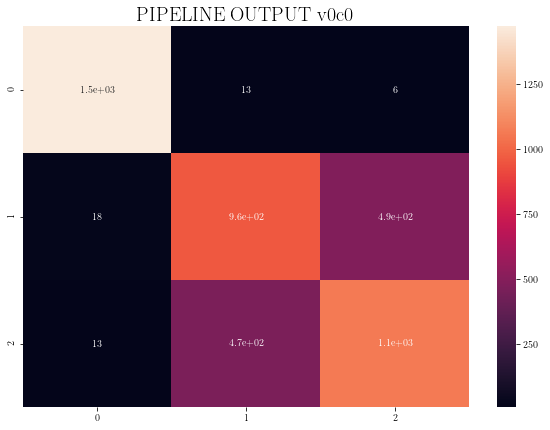

--------------------------------------------
K  =  3
--------------------------------------------
K  =  11
--------------------------------------------
K  =  19
--------------------------------------------
K  =  27
--------------------------------------------
K  =  35
--------------------------------------------
K  =  43
--------------------------------------------
K  =  51
--------------------------------------------
K  =  59
--------------------------------------------
K  =  67
--------------------------------------------
K  =  75
--------------------------------------------
K  =  83
--------------------------------------------
K  =  91
--------------------------------------------
K  =  99
--------------------------------------------
K  =  107
--------------------------------------------
K  =  115
--------------------------------------------
K  =  123
--------------------------------------------
K  =  131
--------------------------------------------
K  =  139
------------------------

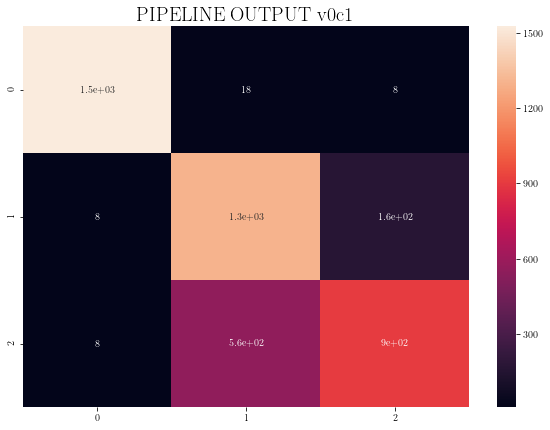

--------------------------------------------
K  =  3
--------------------------------------------
K  =  11
--------------------------------------------
K  =  19
--------------------------------------------
K  =  27
--------------------------------------------
K  =  35
--------------------------------------------
K  =  43
--------------------------------------------
K  =  51
--------------------------------------------
K  =  59
--------------------------------------------
K  =  67
--------------------------------------------
K  =  75
--------------------------------------------
K  =  83
--------------------------------------------
K  =  91
--------------------------------------------
K  =  99
--------------------------------------------
K  =  107
--------------------------------------------
K  =  115
--------------------------------------------
K  =  123
--------------------------------------------
K  =  131
--------------------------------------------
K  =  139
------------------------

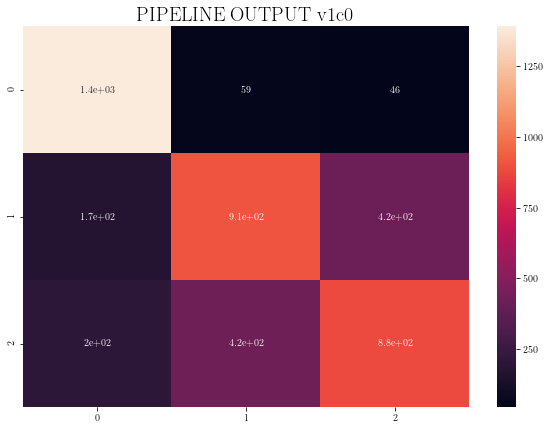

--------------------------------------------
K  =  3
--------------------------------------------
K  =  11
--------------------------------------------
K  =  19
--------------------------------------------
K  =  27
--------------------------------------------
K  =  35
--------------------------------------------
K  =  43
--------------------------------------------
K  =  51
--------------------------------------------
K  =  59
--------------------------------------------
K  =  67
--------------------------------------------
K  =  75
--------------------------------------------
K  =  83
--------------------------------------------
K  =  91
--------------------------------------------
K  =  99
--------------------------------------------
K  =  107
--------------------------------------------
K  =  115
--------------------------------------------
K  =  123
--------------------------------------------
K  =  131
--------------------------------------------
K  =  139
------------------------

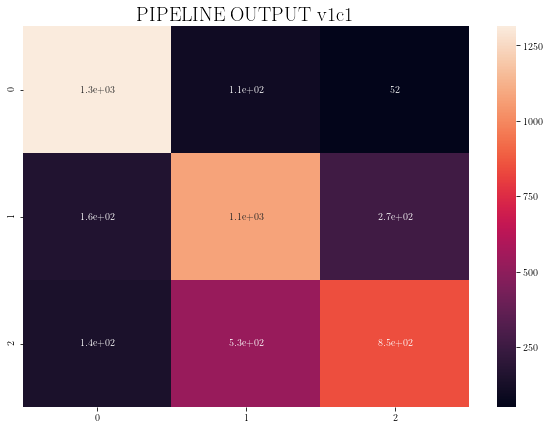

In [100]:
K_max        = 204
K_step       = 8
test_ratio   = 0.3
#Nsamples     = [500, 1000, 2000, 4000, 8000, 16000, 32000]
Nsample      = 15000
K_vec     = list(i for i in range(3,K_max,K_step))

vc = ['v0c0','v0c1','v1c0','v1c1']
score_mtr = np.zeros((4,len(K_vec)))
Ntrain = int((1-test_ratio)*Nsample)
Kopt = np.zeros(4)
maxscore = np.zeros(4)

for j in range(0,4):

    data = extractData('/Users/miquelmiravet/Projects/IPAM_LA/ML_group/IPAM2021_ML/NewRealistic/'+vc[j]+'test_x.csv')
    labels = extractData('/Users/miquelmiravet/Projects/IPAM_LA/ML_group/IPAM2021_ML/NewRealistic/'+vc[j]+'test_tag.csv') #this is mantained through sets and methods, only change when you cahnge versions
    data,labels=utils.shuffle(data,labels)

    xtrain=data[:Ntrain]
    ytrain=labels[:Ntrain]
    xtest=data[Ntrain:Nsample]
    ytest=labels[Ntrain:Nsample]
    
    
    # train for different values of K
    
    score_vec  = np.zeros(len(K_vec))

    for i in range(0,len(K_vec)):
        K       = K_vec[i]
        neigh   = KNeighborsClassifier(n_neighbors=K)
        neigh.fit(xtrain, ytrain.ravel())
        score_vec[i] = neigh.score(xtest, ytest)
    
        print('--------------------------------------------')
        print('K  = ', K)
    
    
    score_mtr[j,:] = score_vec
    maxscore[j] = np.amax(score_vec)
    index = np.where(score_vec == np.amax(score_vec))
    print('index :', index)
    Kopt[j] = K_vec[index[0][0]]
    
    neigh = KNeighborsClassifier(n_neighbors=int(Kopt[j]))
    neigh.fit(xtrain, ytrain.ravel())

    score_i = neigh.score(xtest,ytest)
    
    predict = neigh.predict(xtest)
    
    cm = confusion_matrix(ytest, predict)
    
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=True)
    plt.title('PIPELINE OUTPUT '+ vc[j], fontsize = 20)
    plt.savefig('plots_KNN/pipe_out_cm_'+vc[j]+'.pdf')
    plt.show()


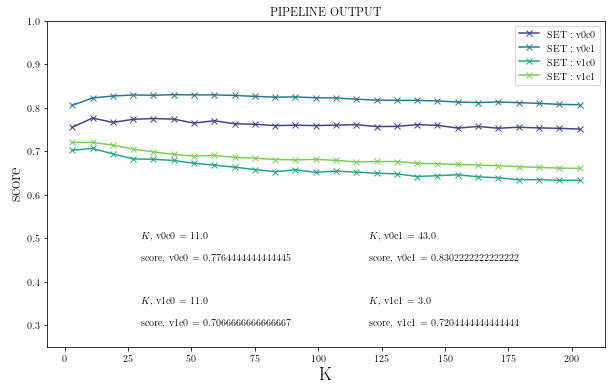

In [101]:
# Plots 
plt.figure(2, figsize=(10, 6))
colors = sns.color_palette("viridis",4)
for j in range(0,4):
    score_vec = score_mtr[j][:];
    plt.plot(K_vec, score_vec, marker = 'x', color = colors[j], label = 'SET : '+vc[j])
plt.xlabel('K', fontsize = 18)
plt.ylabel('score', fontsize = 18)
plt.ylim([0.25,1])
plt.text(30,0.5,r'$K$, '+vc[0]+' = '+str(Kopt[0]))
plt.text(30,0.45,'score, '+vc[0]+' = '+str(maxscore[0]))
plt.text(120,0.5,r'$K$, '+vc[1]+' = '+str(Kopt[1]))
plt.text(120,0.45,'score, '+vc[1]+' = '+str(maxscore[1]))
plt.text(30,0.35,r'$K$, '+vc[2]+' = '+str(Kopt[2]))
plt.text(30,0.3,'score, '+vc[2]+' = '+str(maxscore[2]))
plt.text(120,0.35,r'$K$, '+vc[3]+' = '+str(Kopt[3]))
plt.text(120,0.3,'score, '+vc[3]+' = '+str(maxscore[3]))
plt.title('PIPELINE OUTPUT')
plt.legend()
plt.savefig('plots_KNN/pipe_output.pdf')


In [69]:
    #train your algorithm here.
K     = 11
neigh = KNeighborsClassifier(n_neighbors=K)
neigh.fit(xtrain, ytrain)

score_i = neigh.score(xtest,ytest)
print(score_i)
    
predict = neigh.predict(xtest)



0.8133333333333334


/Users/miquelmiravet/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


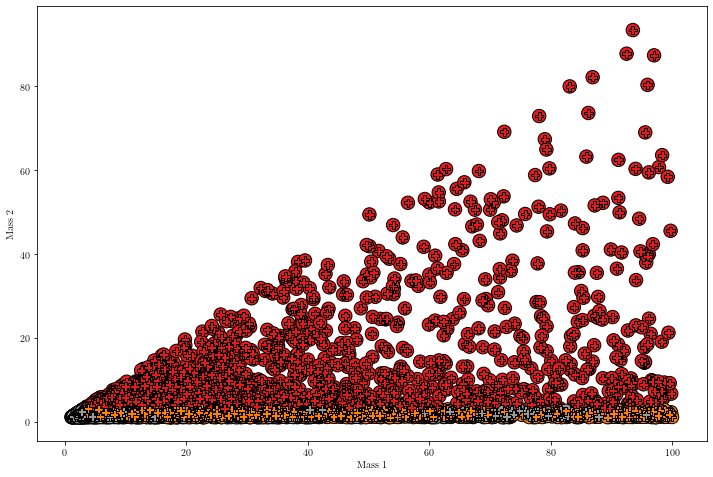

In [37]:
fig = plt.figure(2, figsize=(12, 8))

plt.scatter(xtest[:3500,0], xtest[:3500,1], c=ytest[:3500,0], cmap=plt.cm.Set1, marker='o', s=180, edgecolor='k')
plt.scatter(xtest[:3500,0], xtest[:3500,1], c=predict[:3500],    cmap=plt.cm.Set1, marker='P', s=70,  edgecolor='k')
#xtest[:1000, 2] for the spin
plt.xlabel("Mass 1")
plt.ylabel("Mass 2")
#plt.savefig('Predicted values for NN_set1_v0.png')
plt.show()

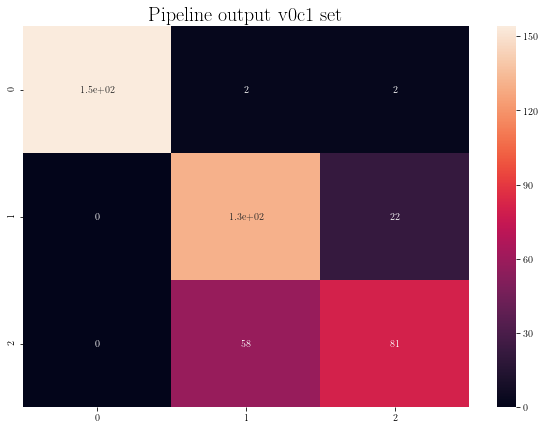

[[154   2   2]
 [  0 131  22]
 [  0  58  81]]


In [71]:
cm = confusion_matrix(ytest, predict)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.title('Pipeline output v0c1 set', fontsize = 20)
plt.show()
print(cm)